# BANK EXITED

## Problem
Terdapat nasabah yang memutuskan untuk berpindah bank atau keluar (exited)

## Goals
Mengetahui faktor yang mempengaruhi nasabah memutuskan untuk berpindah bank

## Import Packages

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Import Dataset

In [87]:
df = pd.read_csv('C:\\Users\\kreep\\Documents\\Data_Science\\Modul_2\\Ujian2\\bank.csv') 
#memasukkan file csv dengan menset direktori atau path saat file berada
df.sample(5) #menampilkan 5 dataset secara acak

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3388,3389,15588622,Marchesi,599,Germany,Male,25,7,108380.72,1,1,1,79005.95,0
9438,9439,15641175,Munro,701,Germany,Male,63,3,120916.52,3,0,0,144727.45,1
941,942,15676521,Y?an,696,France,Female,31,8,0.00,2,0,0,191074.11,0
4505,4506,15628583,Iweobiegbunam,709,France,Female,30,5,0.00,2,0,1,161388.22,0
4477,4478,15595609,Sykes,679,Germany,Male,52,9,135870.01,2,0,0,54038.62,0


## Describe Data

In [16]:
df.shape #mengetahui jumlah baris x kolom

(10000, 14)

dataset memiliki jumlah baris atau banyak data sebesar 10000 serta memiliki kolom sebanyak 14

In [17]:
bsDESC = []

for i in df.columns: #dengan i merupakan tiap kolom
    bsDESC.append([
        i, #kolom
        df[i].dtypes, #tipe kolom
        df[i].isnull().sum(),  #menhitung jumlah data kosong
        round(((df[i].isnull().sum() / len(df)) * 100), 2), #membagi nilai data kosong dibagi banyak data
        df[i].nunique(), #banyak data berbeda
        df[i].drop_duplicates().sample(2).values #diambil 2 data berbeda
    ]) 

In [19]:
dfDesc = pd.DataFrame(data = bsDESC, columns=['Data Feature','Data Type','null','null Percent','unique','unique sample'])
dfDesc

,Data Feature,Data Type,null,null Percent,unique,unique sample
0,RowNumber,int64,0,0.0,10000,"[9787, 3091]"
1,CustomerId,int64,0,0.0,10000,"[15637118, 15791373]"
2,Surname,object,0,0.0,2932,"[Rita, Holden]"
3,CreditScore,int64,0,0.0,460,"[473, 830]"
4,Geography,object,0,0.0,3,"[Spain, Germany]"
5,Gender,object,0,0.0,2,"[Female, Male]"
6,Age,int64,0,0.0,70,"[39, 51]"
7,Tenure,int64,0,0.0,11,"[3, 9]"
8,Balance,float64,0,0.0,6382,"[93934.63, 98926.4]"
9,NumOfProducts,int64,0,0.0,4,"[1, 4]"


Berikut deskripsi kolom pada dataset:
- RowNumber   : Nomor baris
- CustomerID  : ID nasabah untuk membedakkan satu sama lain
- Surname     : Nama pendek nasabah
- CreditScore : Nilai nasabah dalam kemampuan mengembalikan uang kepada bank
- Geography   : Negara nasabah tinggal
- Gender      : Jenis kelamin nasabah
- Age         : Umur nasabah
- Tenure      : Jangka waktu pinjaman (bulan)
- Balance     : Jumlah uang nasabah pada bank
- NumOfProducts : Jenis produk yang dipilih nasabah
- HasCrCard : Nasabah punya kartu kredit tidak
- IsActiveMember : apakah nasabah masih aktif
- EstimatedSalary : estimasi pendapatan nasabah
- Exited : Nasabah keluar bank atau tidak

Pada dataset dapat diketahui bahwa:
- Tidak memiliki nilai null atau data kosong terlihat pada null untuk semua kolom memiliki jumlah 0
- Pada kolom dapat diketahui yang memiliki jenis data berbeda sebanyak 2 yaitu HasCrCard, IsActiveMember dan Exited memiliki isi data berupa Yes atau No dengan Yes = 1 dan No = 2
- Kolom RowNumber dan CostumerId memiliki nilai unique yang sama dengan banyak data itu menyatakan bahwa kolom tersebut adalah kolom yang merepresentasikan perseorangan atau nasabah yang dapat dikaitkan dengan Surname, akan tetapi Surname hanya memiliki unique 2932 dikarenakan pada Surname atau nama seseorang pasti ada yang sama maka dari itu untuk membedakkan nama yang sama menggunakan kolom CustomerID

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


Tabel diatas merpresentasikan :
- Umur nasabah bank memiliki di rerata sebesar 39 tahun atau dapat direpresentasikan 37 tahun dengan termuda 18 tahun dan tertua 92 tahun
- Tenure nasabah bank mengambil dalam jangka 5 bulan
- Balance nasabah bank rerata sebesar 7649, dengan terdapat balance 0 pada nasbah bank
- Estimated Salary nasabah bank memiliki rerata 100009, dengan terendah sebesar 11.58 dan tertinggi 199992.48
- untuk kolom lain dapat di deskripsikan dibawah kecuali CustomerID dan RowNumber karena unique key

In [91]:
yesno = lambda x: 'yes' if x == 1 else 'no' #untuk mengganti 1 dengan yes dan 2 dengan no

In [94]:
df1 = pd.DataFrame({}) #membuaut dataset sintetits baru

df1['HasCrCard'] = df['HasCrCard'].apply(yesno)
df1['IsActiveMember'] = df['IsActiveMember'].apply(yesno)
df1['Exited'] = df['Exited'].apply(yesno)

In [95]:
df1.describe(include=[np.object]).T

,count,unique,top,freq
HasCrCard,10000,2,yes,7055
IsActiveMember,10000,2,yes,5151
Exited,10000,2,no,7963


In [23]:
df.describe(include=[np.object]).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


Dari tabel diketahui : 
- Nasabah paling banyak  memiliki kartu kredit dengan jumlah nasabah 7055
- Nasabah banyak yang masih aktif namun dengan jumlah 5151 dan hal tersebut tidak berbeda jauh dengan yang tidak aktif
- Banyak Nasabah yang bertahan dengan jumlah 7963
- Pria adalah gender terbanyak nasabah bank dengan jumlah 5457
- Geography nasabah paling banyak di France

## Drop Column

In [33]:
df = df.drop(columns=['Surname','RowNumber']) #menghapus kolom surname dan rownumber
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Kolom Surname dan RowNumber dihapus karena surname sudah terwakilkan oleh kolom customerID dan Row number juga merupakan atau sama dengan index

## Exploratory Data Analysis (EDA)

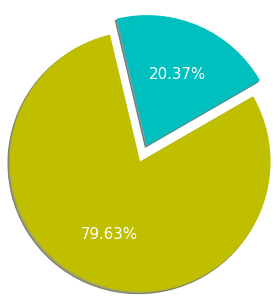

In [49]:
persentase = [df[df['Exited'] == 1]['Exited'].count(), df[df['Exited'] == 0]['Exited'].count()] #mendefinisikan jumlah yang keluar yes dan no
nama = ['Yes', 'No']

plt.pie(
    persentase, #nilai yang dimasukkan pie chart
    labels=nama, #nama
    colors=['c','y'],
    startangle=30, # awalan pie chart
    shadow=True, #biar ada bayangan
    radius=1.5, #ukuran jari jari pir=e chart
    textprops={
        'size' : 15, #ujuran text
        'color' : 'w' #saya make theme dark makanya text nya warnanya putih, bisa digabti k jika tidak terlihat
    },
    autopct='%1.2f%%', #untuk presentase 2 angka dibelakang koma
    explode=(.1, .1) #biar bisa mecah
    )
plt.show()

In [54]:
df.groupby('Exited')['Exited'].count()

Exited
0    7963
1    2037
Name: Exited, dtype: int64

Diagram diatas menunjukkan:
- Nasabah yang memilih untuk keluar atau untuk berpindah bank sebanyak 20,37% dari jumlah nasabah yang ada atau dengan jumlah 2037 nasabah
- 79,63% nasabah atau 7963 nasabah tetap bertahan
- Terlihat pada dataset persentasi antara keluar atau pindah ban dengan bertahan terjadi ketimpangan atau imbalance

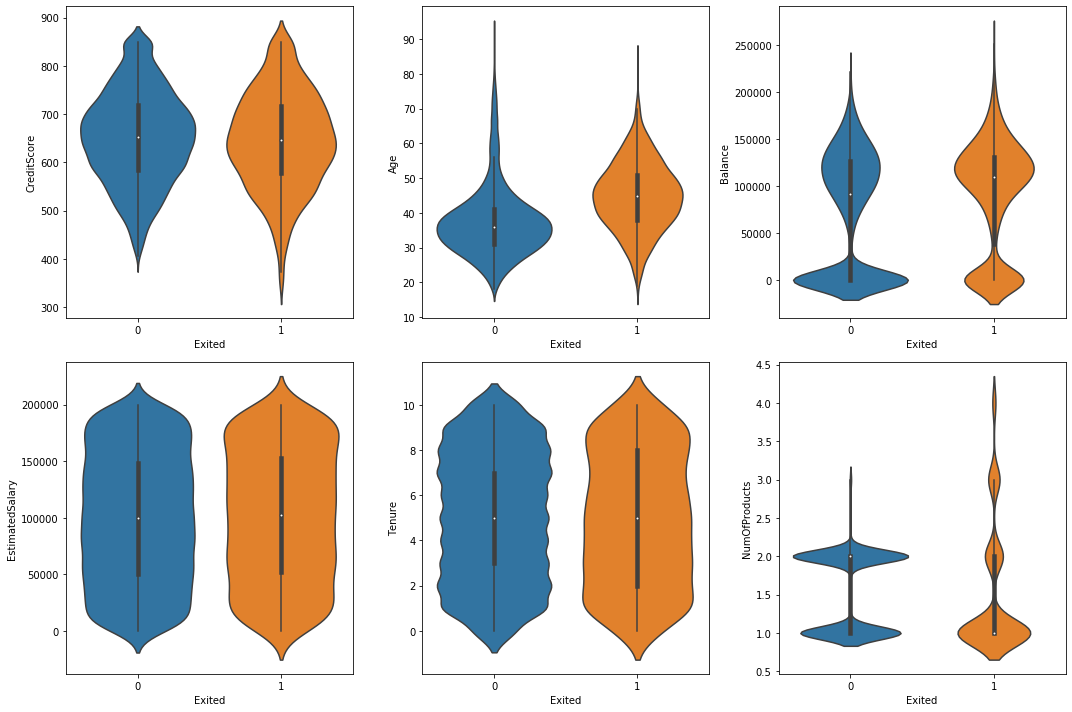

In [83]:
plt.figure('Analisis Exited', figsize=(15,10))

plt.subplot(231) #dengan 2 baris 3 kolom urutan 1
sns.violinplot(x='Exited', y='CreditScore', data=df) 

plt.subplot(232)
sns.violinplot(x='Exited', y='Age', data=df)

plt.subplot(233)
sns.violinplot(x='Exited', y='Balance', data=df)

plt.subplot(234)
sns.violinplot(x='Exited', y='EstimatedSalary', data=df)

plt.subplot(235)
sns.violinplot(x='Exited', y='Tenure', data=df)

plt.subplot(236)
sns.violinplot(x='Exited', y='NumOfProducts', data=df)

plt.tight_layout()
plt.show()

Grafik Violin plot diatas mendefiniskan:
- Tidak ada perbedaan diantara nasabah yang keluar atau pindah bank dengan nasabah yang bertahan pada CreditScore, Estimated Salary dan Tenure, sehingga tidak berpengaruh terhadapa pergi tidaknya atau berpindah tidaknya nasabah dari bank
- Terlihat pada Age bahwa kebanyakan yang berpindah atau keluar dari bank memiliki umur lebih tua dubandingkan dengan nasabah yang memilih untuk bertahan pada bank
- Pada balance diketahui pada nasabah yang bertahan banyak yang, namun nasabah yang meninggalkan bank atau berpindah bank terdapat yang masih memiliki balance juga terlihat di balance 100,000 sampai 150,000 dengan banyak yang hampir sama dengan balance 0
- Pada NumofProducts nasabah yang bertahan minim sekali memilih di 3 bahan untuk 4 tidak ada sama sekali, namun untuk nasabah yang pergi kebanyakan memilih product 1 namun nasabah yang pergi juga memilih product lain atau menyebar kemana mana walopun untuk 3 dan 4 sedikit sekali

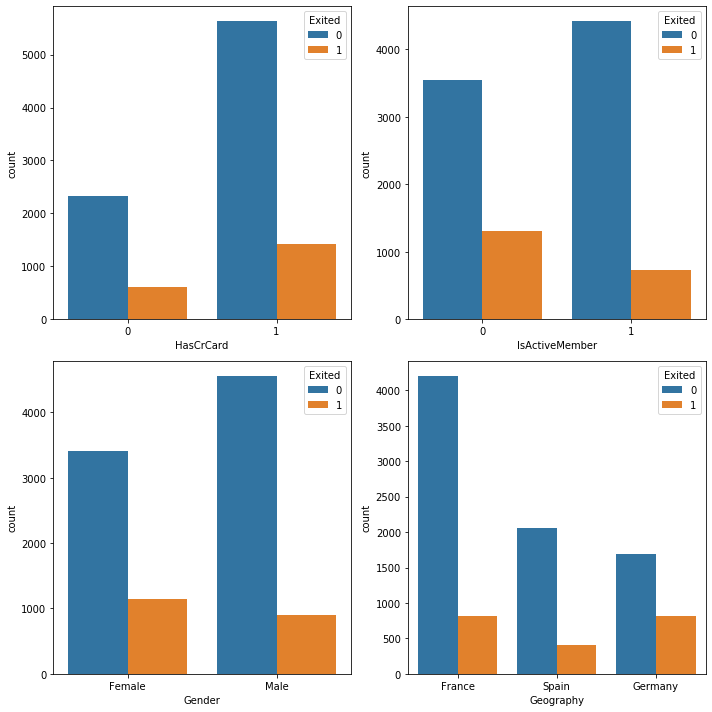

In [85]:
plt.figure('Analisis Exited 2', figsize=(10,10))

plt.subplot(221) #dengan 2 baris 2 kolom urutan 1
sns.countplot(x='HasCrCard', data=df, hue='Exited')

plt.subplot(222)
sns.countplot(x='IsActiveMember', data=df, hue='Exited')

plt.subplot(223)
sns.countplot(x='Gender', data=df, hue='Exited')

plt.subplot(224)
sns.countplot(x='Geography', data=df, hue='Exited')

plt.tight_layout()
plt.show()

Grafik diatas mendefiniskan :
- Pada HasCrCard yang mempunyai kartu kredit lebih banyak dibandingkan dengan yang tidak namun, diketahui juga bahwa nasabah yang pergi memiliki kartu kredit lebih banyak dibandingkan dengan nasabah yang bertahan
- Pada IsActiveMember nasabah yang pergi lebih banyak yang sudah tidak aktif dibanding yang masih aktif, sedangkan yang bertahan banyak yang masih aktif dibandingkan dengan yang tidak aktif
- Pada Gender nasabah yang pergi kebanyak Female namun perbedaannya tidak signifikan kecuali yang bertahan banyak yang Male dan cukup signifikan
- Pada Geography nasabah banyak yang dari France untuk yang masi bertahan, namun nasabah yang pergi antara France dengan Germany hampir sama

## Kesimpulan
- Faktor yang mempengaruhi nasabah untuk berpindah bank atau pergi adalah Age, NumofProducts terutama 3 dan 4, IsActiveMember dan HasCrCard

## Saran
- Bank dapat memaksimalkan layanan pada usia lanjut
- NumofProduct 3 dan 4 dihilangkan
- Kartu kredit untuk diperhatikan layanannya kepada nasabah